In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
"""
read dataset
"""

heart_disease = "heart_statlog.csv"
df = pd.read_csv(heart_disease)
df

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,present
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,absent
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,present
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,absent
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,absent
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,absent
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,absent
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,absent


In [7]:
# create train-test sets
x = df.drop(columns="class")
y = df["class"]

print(y)
x

0      present
1       absent
2      present
3       absent
4       absent
        ...   
265     absent
266     absent
267     absent
268     absent
269    present
Name: class, Length: 270, dtype: object


,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [8]:
labels = np.unique(y)
print(labels)

feature_names = x.columns
print(feature_names)

['absent' 'present']
Index(['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
       'slope', 'number_of_major_vessels', 'thal'],
      dtype='object')


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [10]:
print("train samples: ", len(x_train))
print("test samples: ", len(x_test))

train samples:  189
test samples:  81


In [11]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

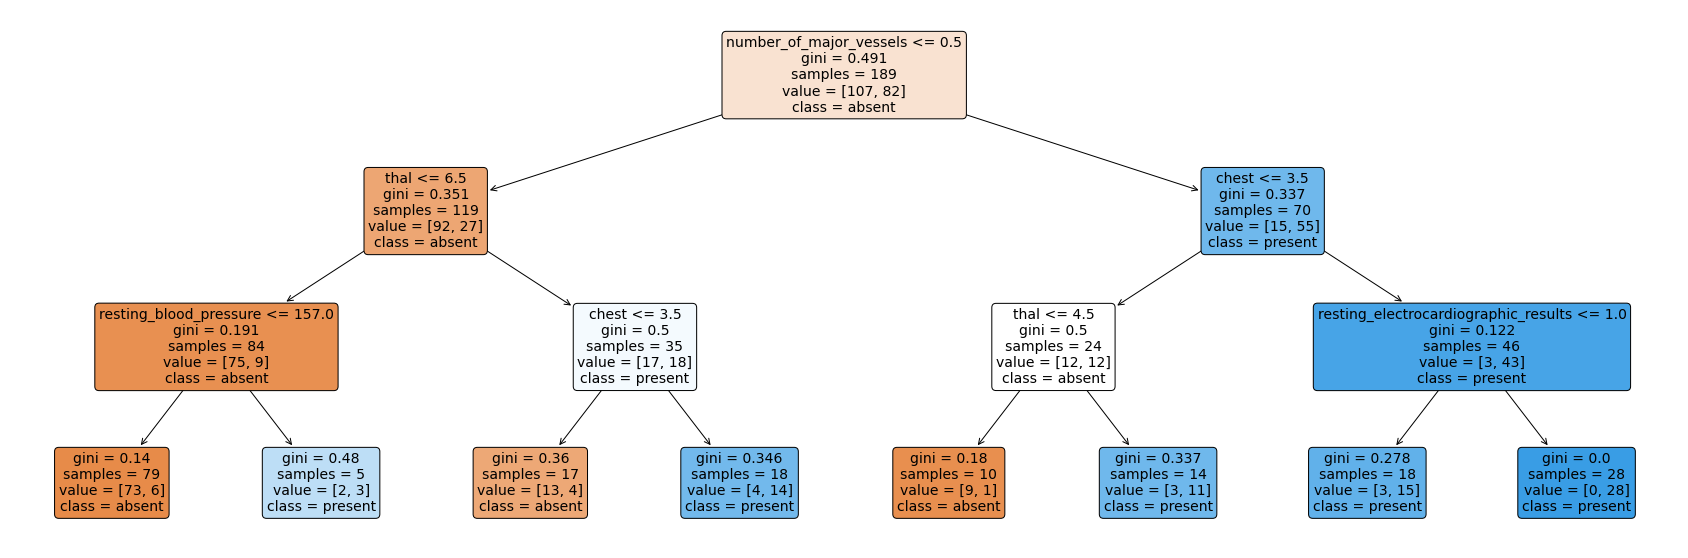

In [15]:
plt.figure(figsize=(30,10))
a = tree.plot_tree(dtree, feature_names = feature_names, class_names = labels, rounded = True, filled = True, fontsize=14)
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))

[[41  2]
 [10 28]]


In [18]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.80      0.95      0.87        43
     present       0.93      0.74      0.82        38

    accuracy                           0.85        81
   macro avg       0.87      0.85      0.85        81
weighted avg       0.86      0.85      0.85        81

